In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def build_sample_image():
    """Builds a sample image to search for contours"""

    # Create a 500x500 gray image (70 intensity) with a rectangle and a circle inside:
    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)

    return img


def build_sample_image_2():
    """Builds a sample image to search for contours"""

    # Create a 500x500 gray image (70 intensity) with a rectangle and a circle inside:
    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
    cv2.rectangle(img, (150, 150), (250, 250), (70, 70, 70), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)
    cv2.circle(img, (400, 400), 50, (70, 70, 70), -1)

    return img

In [ ]:
def array_to_tuple(arr):
    """Converts array to tuple"""

    return tuple(arr.reshape(1, -1)[0])


def draw_contour_points(img, cnts, color):
    """Draw all points from a list of contours"""

    for cnt in cnts:
        print(cnt.shape)
        squeeze = np.squeeze(cnt)
        print(squeeze.shape)

        for p in squeeze:
            pp = array_to_tuple(p)
            cv2.circle(img, pp, 3, color, -1)

    return img

In [ ]:
def img_plt(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 8))
plt.suptitle("Contours approximation method", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

<Figure size 864x576 with 0 Axes>

Contour Compression is reducing number of points through ``method``

- compression can be disabled by ``cv2.CHAIN_APPROX_NONE`` means all boundary points are intact

- ``cv2.CHAIN_APPROX_SIMPLE`` compresses __horizontal__, __vertical__ and __diagonal__ segments, preserving only endpoints

- ``cv2.CHAIN_APPROX_TC89_L1`` and ``cv2.CHAIN_APPROX_TC89_KCOS`` uses discrete curvature measures.

In [ ]:
# Load the image and convert it to grayscale:
image = build_sample_image_2()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply cv2.threshold() to get a ginary image:
ret, thresh = cv2.threshold(gray_image, 70, 255, cv2.THRESH_BINARY)

(284, 1, 2)
(284, 2)
(564, 1, 2)
(564, 2)
(404, 1, 2)
(404, 2)
(800, 1, 2)
(800, 2)
(148, 1, 2)
(148, 2)
(286, 1, 2)
(286, 2)
(8, 1, 2)
(8, 2)
(4, 1, 2)
(4, 2)
(44, 1, 2)
(44, 2)
(106, 1, 2)
(106, 2)
(4, 1, 2)
(4, 2)
(4, 1, 2)
(4, 2)
(52, 1, 2)
(52, 2)
(82, 1, 2)
(82, 2)
(4, 1, 2)
(4, 2)
(4, 1, 2)
(4, 2)


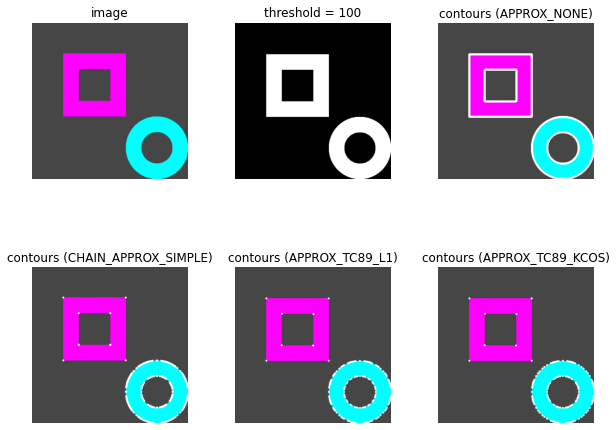

In [ ]:
# Find contours using different methods:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3 = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_L1)
contours4, hierarchy4 = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)

# Draw the contours in the previously created images:
draw_contour_points(image, contours, (255, 255, 255))
draw_contour_points(image, contours2, (255, 255, 255))
draw_contour_points(image, contours3, (255, 255, 255))
draw_contour_points(image, contours4, (255, 255, 255))

# Plot all the figures:
img_plt(image, "Original Image", 1)
img_plt(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), "Threshold = 100", 2)
img_plt(image, "Contours (APPROX_NONE)", 3)
img_plt(image, "Contours (CHAIN_APPROX_SIMPLE)", 4)
img_plt(image, "Contours (APPROX_TC89_L1)", 5)
img_plt(image, "Contours (APPROX_TC89_KCOS)", 6)

plt.subplots_adjust(top=3,bottom=1.5, right=1.5, left=0.2, wspace=0.3, hspace=0.3)
plt.show()
